### sklearn.metrics.confusion_matrix

* sklearn.metrics.confusion_matrix(_y_true_, _y_pred_, _*_, _labels=None_, _sample_weight=None_, _normalize=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_classification.py#L222)[¶](https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix "Permalink to this definition")

Parameters:

**y_true**array-like of shape (n_samples,)

Ground truth (correct) target values.

**y_pred**array-like of shape (n_samples,)

Estimated targets as returned by a classifier.

**labels**array-like of shape (n_classes), default=None

List of labels to index the matrix. This may be used to reorder or select a subset of labels. If  `None`  is given, those that appear at least once in  `y_true`  or  `y_pred`  are used in sorted order.

**sample_weight**array-like of shape (n_samples,), default=None

Sample weights.

New in version 0.18.

**normalize**{‘true’, ‘pred’, ‘all’}, default=None

Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_test =list(np.zeros(405)) + list(np.ones(45))
fakepred = list(np.zeros(450)) 
confusion_matrix(y_test, fakepred)


array([[405,   0],
       [ 45,   0]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"정확도 : {accuracy_score(y_test,fakepred)}, 정밀도 : {precision_score(y_test,fakepred)}, 재현율 :  {recall_score(y_test,fakepred)} 정밀도와 재현율의 조화평균 : {f1_score(y_test,fakepred)}")

정확도 : 0.8222222222222222, 정밀도 : 1.0, 재현율 :  0.68 정밀도와 재현율의 조화평균 : 0.8095238095238095


In [23]:
y_test =list(np.zeros(405)) + list(np.ones(45))
fakepred = list(np.zeros(350)) + list(np.ones(100))

print(confusion_matrix(y_test, fakepred))
print(f"정확도 : {accuracy_score(y_test,fakepred)}, 정밀도 : {precision_score(y_test,fakepred)}, 재현율 :  {recall_score(y_test,fakepred)} 정밀도와 재현율의 조화평균 : {f1_score(y_test,fakepred)}")

[[350  55]
 [  0  45]]
정확도 : 0.8777777777777778, 정밀도 : 0.45, 재현율 :  1.0 정밀도와 재현율의 조화평균 : 0.6206896551724138


In [24]:
y_test =list(np.zeros(200)) + list(np.ones(250))
fakepred = list(np.zeros(280)) + list(np.ones(170))

print(confusion_matrix(y_test, fakepred))
print(f"정확도 : {accuracy_score(y_test,fakepred)}, 정밀도 : {precision_score(y_test,fakepred)}, 재현율 :  {recall_score(y_test,fakepred)} 정밀도와 재현율의 조화평균 : {f1_score(y_test,fakepred)}")

[[200   0]
 [ 80 170]]
정확도 : 0.8222222222222222, 정밀도 : 1.0, 재현율 :  0.68 정밀도와 재현율의 조화평균 : 0.8095238095238095


### sklearn.metrics.precision_recall_curve

*sklearn.metrics.precision_recall_curve(_y_true_,  _probas_pred_,  _*_,  _pos_label=None_,  _sample_weight=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b6/sklearn/metrics/_ranking.py#L788)[](https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precisi#sklearn.metrics.precision_recall_curve "Permalink to this definition")

Parameters:

**y_true**ndarray of shape (n_samples,)

True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.

**probas_pred**ndarray of shape (n_samples,)

Target scores, can either be probability estimates of the positive class, or non-thresholded measure of decisions (as returned by  `decision_function`  on some classifiers).

**pos_label**int or str, default=None

The label of the positive class. When  `pos_label=None`, if y_true is in {-1, 1} or {0, 1},  `pos_label`  is set to 1, otherwise an error will be raised.

**sample_weight**array-like of shape (n_samples,), default=None

Sample weights.


Returns:

**precision**ndarray of shape (n_thresholds + 1,)

Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

**recall**ndarray of shape (n_thresholds + 1,)

Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

**thresholds**ndarray of shape (n_thresholds,)

Increasing thresholds on the decision function used to compute precision and recall where  `n_thresholds  =  len(np.unique(probas_pred))`.

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

tt_df = pd.read_csv('./datasets/titanic_train.csv')
tt_test_df = pd.read_csv('./datasets/titanic_test.csv')



# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

tt_df_1 = transform_features(tt_df)
tt_test_df_1 = transform_features(tt_test_df)

# label , feature
label = tt_df_1['Survived']
features = tt_df_1.drop(columns='Survived')

lr_clf = LogisticRegression()
lr_clf.fit(features , label)
lr_pred = lr_clf.predict(tt_test_df_1)

pred_proba = lr_clf.predict_proba(tt_test_df_1)
print(pred_proba)

[[0.90004657 0.09995343]
 [0.56777228 0.43222772]
 [0.89778678 0.10221322]
 [0.89259509 0.10740491]
 [0.36447892 0.63552108]
 [0.84377387 0.15622613]
 [0.3871788  0.6128212 ]
 [0.75912493 0.24087507]
 [0.26397839 0.73602161]
 [0.87198541 0.12801459]
 [0.90256127 0.09743873]
 [0.70565918 0.29434082]
 [0.04977606 0.95022394]
 [0.91485654 0.08514346]
 [0.13274651 0.86725349]
 [0.14641714 0.85358286]
 [0.78207977 0.21792023]
 [0.82946098 0.17053902]
 [0.40366249 0.59633751]
 [0.467459   0.532541  ]
 [0.69760638 0.30239362]
 [0.82066084 0.17933916]
 [0.1038909  0.8961091 ]
 [0.4277182  0.5722818 ]
 [0.07891103 0.92108897]
 [0.94684745 0.05315255]
 [0.03492072 0.96507928]
 [0.83638003 0.16361997]
 [0.51576004 0.48423996]
 [0.86866386 0.13133614]
 [0.87473424 0.12526576]
 [0.74679445 0.25320555]
 [0.45231313 0.54768687]
 [0.43002674 0.56997326]
 [0.38842193 0.61157807]
 [0.81741595 0.18258405]
 [0.43002674 0.56997326]
 [0.35683534 0.64316466]
 [0.8860716  0.1139284 ]
 [0.90256127 0.09743873]


In [81]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

y_test = pd.read_csv("../ml/datasets/gender_submission.csv")
y_test = y_test["Survived"]

lr_clf = LogisticRegression()
lr_clf.fit(features , label)
lr_pred = lr_clf.predict(tt_test_df_1)

pred_proba = lr_clf.predict_proba(tt_test_df_1)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)


In [82]:
thresholds.shape

(269,)

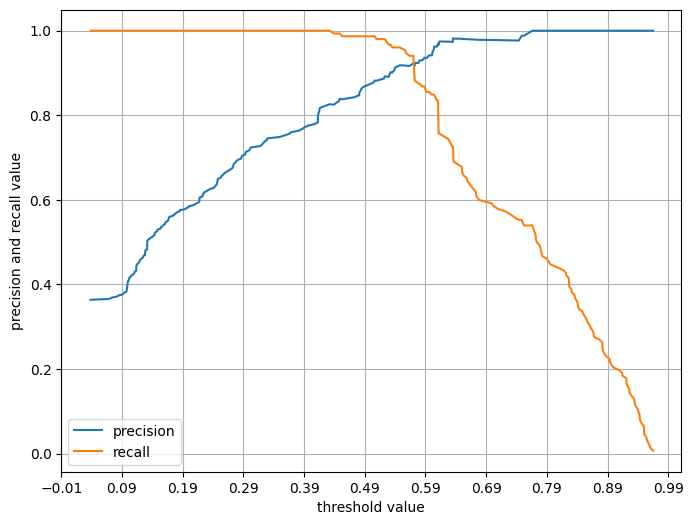

In [85]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

plt.figure(figsize=(8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precisions[0:threshold_boundary],label = "precision")
plt.plot(thresholds, recalls[0:threshold_boundary],label = "recall")

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end , 0.1),2))

plt.xlabel("threshold value"); plt.ylabel("precision and recall value")
plt.legend()
plt.grid()
plt.show()
